In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns

In [2]:
df = pd.read_csv("placement01.csv")

In [3]:
df.head()

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0


# 1. Data is normally Distributed or not.

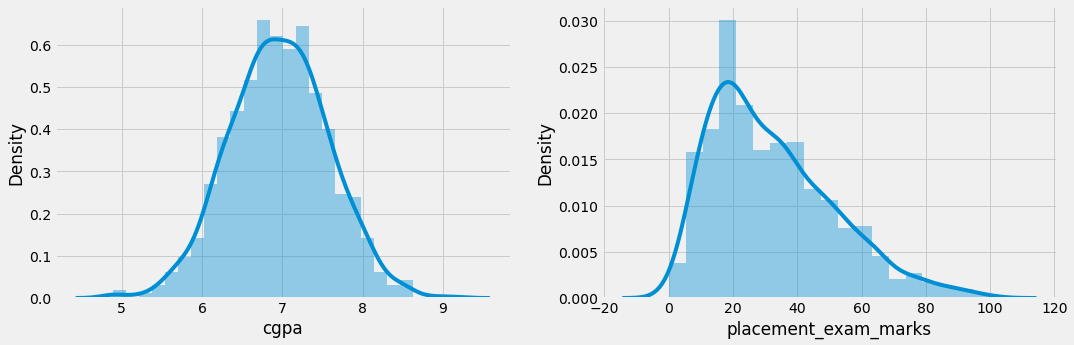

In [4]:
plt.style.use("fivethirtyeight")
plt.figure(figsize=(16,5))
plt.subplot(121)
sns.distplot(df["cgpa"])

plt.subplot(122)
sns.distplot(df["placement_exam_marks"])
plt.show()

In [5]:
df["placement_exam_marks"].skew() , df["cgpa"].skew()

(0.8356419499466834, -0.014529938929314918)

# In cgpa Data is Normally distributed so we use Z-Score Method But in placement_exam_marks we can't use Z-score Method Beacuse Data is Right skew.So we use in this scanario IQR Box Plot Method

<img src="https://www.simplypsychology.org/boxplot.jpg" width="300" />

Definitions <br>
Minimum Score

The lowest score, excluding outliers (shown at the end of the left whisker).

Lower Quartile

Twenty-five percent of scores fall below the lower quartile value (also known as the first quartile).

Median

The median marks the mid-point of the data and is shown by the line that divides the box into two parts (sometimes known as the second quartile). Half the scores are greater than or equal to this value and half are less.

Upper Quartile

Seventy-five percent of the scores fall below the upper quartile value (also known as the third quartile). Thus, 25% of data are above this value.

Maximum Score

The highest score, excluding outliers (shown at the end of the right whisker).

Whiskers

The upper and lower whiskers represent scores outside the middle 50% (i.e. the lower 25% of scores and the upper 25% of scores).

The Interquartile Range (or IQR)

This is the box plot showing the middle 50% of scores (i.e., the range between the 25th and 75th percentile).

<img src="https://www.simplypsychology.org/boxplot-quartiles.jpg" width="300" />

<img src="https://editor.analyticsvidhya.com/uploads/12311IQR.png" width="300" />
For example, outside 1.5 times the interquartile range above the upper quartile and below the lower quartile (Q1 - 1.5 * IQR or Q3 + 1.5 * IQR). Reside outliers

# To check outliers we use boxplot.

<AxesSubplot:xlabel='placement_exam_marks'>

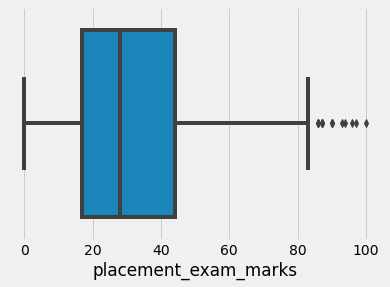

In [6]:
sns.boxplot(df["placement_exam_marks"])

In [7]:
df["placement_exam_marks"].describe()

count    1000.000000
mean       32.225000
std        19.130822
min         0.000000
25%        17.000000
50%        28.000000
75%        44.000000
max       100.000000
Name: placement_exam_marks, dtype: float64

<img src="https://editor.analyticsvidhya.com/uploads/12311IQR.png" width="300" />

# A quantile defines a particular part of a data set, i.e. a quantile determines how many values in a distribution are above or below a certain limit.

In [8]:
# Finding the IQR
percentle25 = df["placement_exam_marks"].quantile(0.25)
percentle75 = df["placement_exam_marks"].quantile(0.75)

In [9]:
percentle25

17.0

In [10]:
# IQR Cover 50 Percentage Data.
iqr = percentle75 - percentle25
iqr

27.0

# Upper limit  Q3 + 1.5 * IQR
# Lower limit  Q1 - 1.5 * IQR

In [11]:
upper_limit = percentle75+1.5*iqr
lower_limit = percentle25-1.5*iqr

In [12]:
print("Upper limit",upper_limit)
print("Lower limit",lower_limit)

Upper limit 84.5
Lower limit -23.5


In [13]:
df[df['placement_exam_marks'] > upper_limit]

,cgpa,placement_exam_marks,placed
9,7.75,94.0,1
40,6.60,86.0,1
61,7.51,86.0,0
134,6.33,93.0,0
162,7.80,90.0,0
283,7.09,87.0,0
290,8.38,87.0,0
311,6.97,87.0,1
324,6.64,90.0,0
630,6.56,96.0,1


In [14]:
df[df["placement_exam_marks"] < lower_limit]

,cgpa,placement_exam_marks,placed


# Triming 

In [15]:
df.shape

(1000, 3)

In [16]:
new_df = df[df["placement_exam_marks"] < upper_limit]
new_df

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0
...,...,...,...
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
998,8.62,46.0,1


In [17]:
new_df.shape

(985, 3)

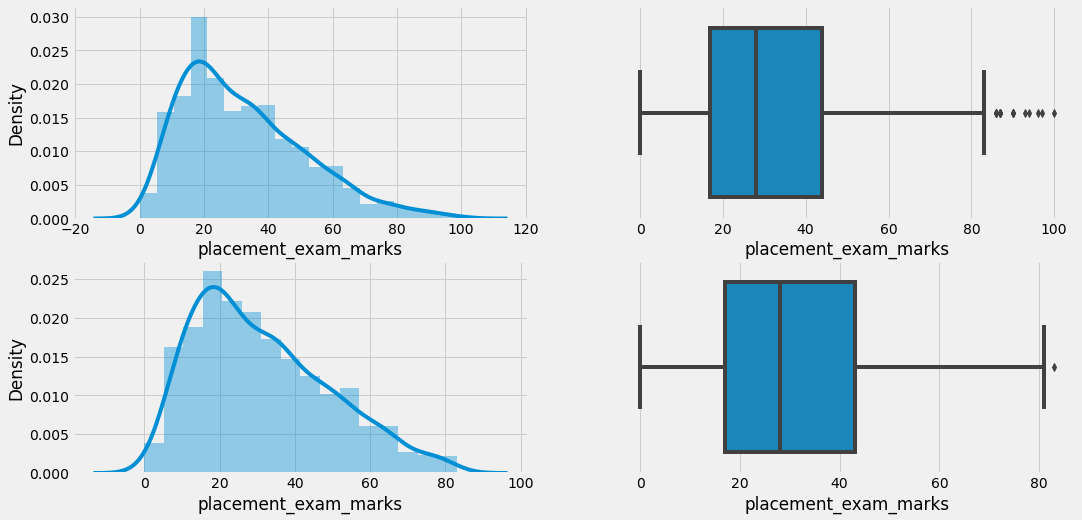

In [18]:
# Comparing

plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(df['placement_exam_marks'])

plt.subplot(2,2,2)
sns.boxplot(df['placement_exam_marks'])

plt.subplot(2,2,3)
sns.distplot(new_df['placement_exam_marks'])

plt.subplot(2,2,4)
sns.boxplot(new_df['placement_exam_marks'])

plt.show()

In [19]:
new_df_cap = df.copy()

In [20]:
new_df_cap.shape

(1000, 3)

In [21]:
new_df_cap['placement_exam_marks'] = np.where(
    new_df_cap['placement_exam_marks'] > upper_limit,
    upper_limit,
    np.where(
        new_df_cap['placement_exam_marks'] < lower_limit,
        lower_limit,
        new_df_cap['placement_exam_marks']
    )
)

In [22]:
new_df_cap

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0
...,...,...,...
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
998,8.62,46.0,1


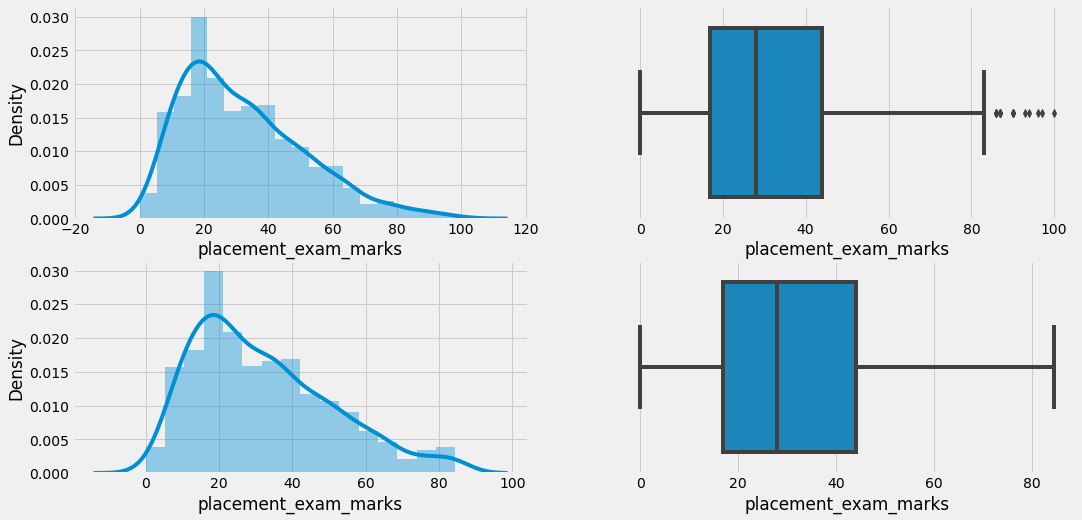

In [23]:
# Comparing

plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(df['placement_exam_marks'])

plt.subplot(2,2,2)
sns.boxplot(df['placement_exam_marks'])

plt.subplot(2,2,3)
sns.distplot(new_df_cap['placement_exam_marks'])

plt.subplot(2,2,4)
sns.boxplot(new_df_cap['placement_exam_marks'])

plt.show()